# Implementing a SVM from scratch and utilizing Kernels for classification.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA


**1. Generating Random linearly separable data**


In [9]:

data = [[np.random.rand(), np.random.rand()] for i in range(10)]

for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



**2. Visualizing the above data**

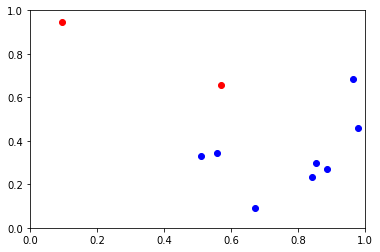

In [10]:

for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)


**3. Training a SVM classifier using Gradient descent, returning Weight Matrix ( numpy array of length (N + 1) where N is dimension of training samples) .**

In [11]:

from random import randint as ran
def svm_function(x, y, epoch, l_rate):
    t=x.shape[1]+1
    p=x.shape[0]
    bias=np.ones((p,1))             #bias is initialized as array of ones
    x=np.append(x,bias,axis=1)      # appending bias to calculate it along with weights
    w = np.zeros(t)
    
    for i in range(epoch): 
        k = ran(0,p-1)              #selecting a random feature index for finding w
        result = y[k]*np.dot(x[k],w)
        
        # following steps from reference paper
        if result < 1:
            w = (1-(1/(i+1))) * w + (y[k] * x[k])/(l_rate*(i+1))
        else:
            w = (1-(1/(i+1)))*w
            
        n = 1/((np.sqrt(l_rate))*LA.norm(w))
        
        if n<1: w = w*n
    return w
    


**4. Run SVM Classifier**


In [12]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 0.001)
print(w) #obtained weight matrix

[-5.69672523  7.12656763 -0.53839621]


In [13]:
# search for best l_rate and epoch(not in assignment, done as extra work)
l_rate=np.arange(0.001,0.01,0.01)
epoch= np.arange(10000,70000,20000)
dist=0
error=100000                         #initializing with a random value
for j in epoch:
    for k in l_rate:                 # iterating trough all hyper parameter values
        w= svm_function(X, Y, j, k)  #weights are calculated with svm 
        
        for x1, x2, l in data:       # choosing all features one by one
            
            dist+= abs(w[0]*x1 +w[1]*x2+w[2])/(w[0]**2+w[1]**2)**0.5 
            #calculating perpendicular distance from all points to plane
            
        if dist<error:               #updating minimum error
            error=dist
            print(k, j, error)       # to manually choose hyper paramater with least error
    dist=0                          
    #resetting perpendicular distance to calculate error for next hyperparameter 

0.001 10000 2.884573777533834


0.001 10000 2.1774161849657596
0.001 30000 2.155541807224706
0.001 50000 2.13349708747734

### **5. Visualize the classifier**


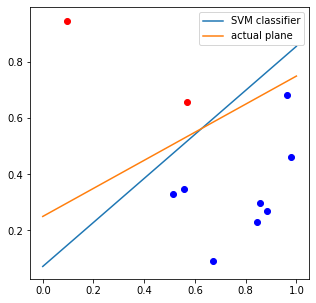

In [14]:
x= np.arange(0,1.2,0.2)
a=-w[0]/w[1]                        # slope
b=-w[2]/w[1]                        # distance from origin to point on y axis
y= a* x + b                         # SVM classification line
y1=0.5*x + 0.25                     # original line
fig = plt.figure(figsize=(5,5))

ax = plt.subplot(111)
for x1, x2, l in data:              # scatter plot of data++++-
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    ax.scatter(x1, x2, c=clr)
    
ax.plot(x,y,label='SVM classifier') # plotting predicted line
ax.plot(x,y1,label='actual plane')  # plotting actual line
ax.legend()


### 5. Creating Linearly Non-separable Data

          x         y  label
0 -0.564781  0.750926      0
1 -0.498969  0.924805      0
2 -0.185440  0.768006      1
3 -0.695573  0.213115      1
4  0.681638  0.446433      1


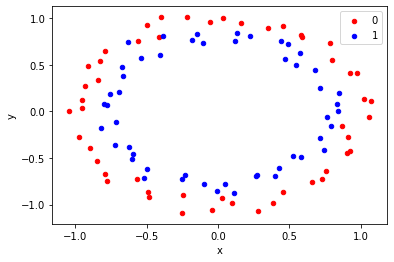

In [15]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

X, y = make_circles(n_samples=100, noise=0.05)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
print(df.head())
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


**6. Training a SVM classifier on the linearly non-separable data**
### Implementing a square kernel

In [16]:

def Square_kernel3d(x):
    num_fetures=3                            #for 3dimensional view
    size = (len(x) , num_fetures)            #defining shape of transformed data
    F = np.zeros(size)                       # initializing array
    for i in range(len(x)):
        F[i,0] = x[i,0]**2                   # x coordinate is squared
        F[i,1] = np.sqrt(2)* x[i,1]*x[i,0]   #1.414*x*y
        F[i,2] = x[i,1]**2                   # y coordinate squared
    return F


In [17]:
X = X
Y = y
F = Square_kernel3d(X)
F.shape[1]
#print(F,y)

#Run SVM Classifier
w = svm_function(F, Y, 10000, 0.001)
print(w)

[0.25364341 0.01144577 0.22693363 0.88571013]


**7. Visualize the data points in the new feature space**


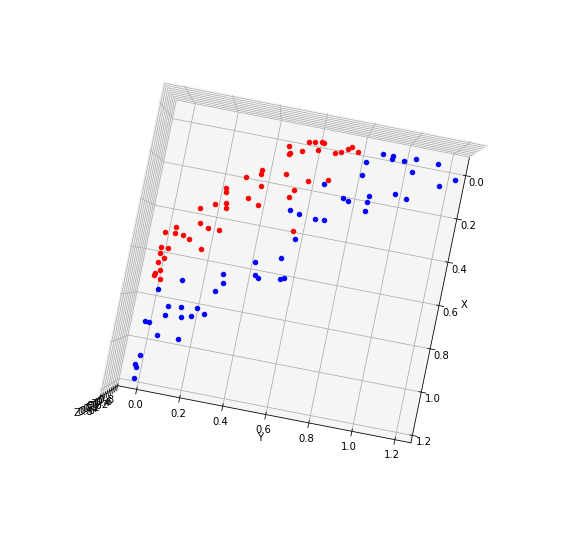

In [18]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

Y = Y.reshape((len(F),1))   
# reshaping array to color tag data points in 3D

F=np.append(F,Y,axis=1) 

#Visualizing the above data
for x, y,z, l in F:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    ax.scatter( x,z,y, c=clr)
    ax.view_init(elev=90., azim=10) 
    # elevation hels view the sagregation of blue and red data
    
    ax.set(xlabel="X", ylabel='Y', zlabel='Z')
    
plt.show()

